# **Projeto Boston Housing**

Neste projeto você deverá desenvolver um projeto offline de ponta a ponta. Nesta atividade, porém, vamos trabalhar com o Boston Housing.
Você pode fazer em dupla, mas todos os membros devem participar de todas as etapas, inclusive da gravação do vídeo (ver etapa 3). Todos os membros da equipe devem fazer submissão individual no moodle, ainda que o trabalho seja feito em equipe.

As etapas do projeto são as seguintes:

Desenvolver o projeto completamente, o que consiste:

1. Descrição do conjunto de dados;

2. Separação do conjunto em treino e teste;

3. Visualização do conjunto de dados (análise exploratória básica);

4. Preparação do conjunto de dados;

5. Comparar ao menos 3 modelos de machine learning e algumas configuração de hiperparâmetros, justificando a escolha do melhor modelo;

6. Você deve ainda justificar a escolha da métrica utilizada;

7. Deve discutir a técnica utilizada para validar o modelo e deve explicar como que o seu modelo evita o "snooping bias/data leakage";

8. Fazer teste final para obter um erro aproximado.

2 - A segunda etapa consiste em você disponibilizar o projeto no GitHub, através de um link. Você não precisa se aprofundar em GitHub, é suficiente você criar uma conta e fazer upload manualmente pelo browser.  A ideia é que você se acostume a criar um portfólio para as suas atividades sorriso

3 - A terceira etapa consite em você gravar um vídeo de, no máximo, 15 min (20 min se feito em dupla). Neste vídeo você fará uma apresentação dos principais pontos do projeto, ilustrando quais foram as dificuldades. Precisa ficar claro que você domina todas as etapas de um projeto de ML offline. Minha sugestão é fazer upload em um link privado do YouTube, se ficar bom você pode deixar público para o portfólio de vocês.

4 - O formato da entrega é jupyter notebook para o projeto, lá você pode adicionar o link para o vídeo também.

Você pode encontrar as informações e o dataset aqui nesse link.

Dica: Revise aulas sobre Califórnia Housing, assim como o notebook disponível no meu github.

# 0. Importa Dados Boston Housing

Fonte: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Existem 14 atributos em cada caso do conjunto de dados. Eles são:

CRIM - taxa de criminalidade per capita por cidade

ZN - proporção de terrenos residenciais zoneados para lotes acima de 25.000 pés quadrados

INDUS - proporção de acres de negócios não varejistas por cidade.

CHAS - Variável fictícia do Rio Charles (1 se o trato limita o rio; 0 caso contrário)

NOX - concentração de óxidos nítricos (partes por 10 milhões)

RM - número médio de cômodos por moradia

AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940

DIS - distâncias ponderadas para cinco centros de emprego de Boston

RAD - índice de acessibilidade a rodovias radiais

TAX - taxa de imposto sobre a propriedade com valor integral por US$ 10.000
PTRATIO - proporção aluno-professor por cidade

B - 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade

LSTAT - % de status inferior da população

MEDV - Valor mediano de casas ocupadas pelo proprietário em US$ 1.000

In [1]:
#### INSTALAR isso =)
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [2]:
#### Replicabilidade das Coisas
seed = 26011994

In [3]:
#### Libs
import pandas as pd

In [4]:
import pandas as pd

# URL do dataset no UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# Definindo os nomes das colunas (segundo a documentação do dataset no UCI)
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Carregando o dataset
housing = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Exibindo as primeiras linhas
print(housing.head())

<ipython-input-4-50a8728fb92f>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  housing = pd.read_csv(url, delim_whitespace=True, names=column_names)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### ** Note que existem variáveis inteiras as quais não necessáriamente representam quantidades. **

# 1. Descrição do conjunto de dados

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
round(housing.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [7]:
### Verifica Missing

# Calcular o percentual de valores ausentes por variável
missing_percentage = housing.isnull().mean() * 100

# Criar um DataFrame para exibir de forma mais clara
missing_df = missing_percentage.reset_index()
missing_df.columns = ['Variável', 'Percentual de Missing']
missing_df = missing_df.sort_values(by='Percentual de Missing', ascending=False)

# Exibir o resultado
print(missing_df)


   Variável  Percentual de Missing
0      CRIM                    0.0
1        ZN                    0.0
2     INDUS                    0.0
3      CHAS                    0.0
4       NOX                    0.0
5        RM                    0.0
6       AGE                    0.0
7       DIS                    0.0
8       RAD                    0.0
9       TAX                    0.0
10  PTRATIO                    0.0
11        B                    0.0
12    LSTAT                    0.0
13     MEDV                    0.0


In [8]:
# @title CHAS - Variável fictícia do Rio Charles (1 se o trato limita o rio; 0 caso contrário)
housing.loc[:,['CHAS']].value_counts()

,count
CHAS,
0,471
1,35


In [49]:
'''# @title Dashboard de Análise Descritiva
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objs as go

df = housing
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dashboard de Análise Descritiva"),

    # Dropdown para selecionar a variável
    html.Label("Selecione a variável:"),
    dcc.Dropdown(
        id='dropdown-variable',
        options=[{'label': col, 'value': col} for col in df.columns],
        value='MEDV'
    ),

    # Saída das estatísticas descritivas
    html.Div(id='output-descriptive-stats'),

    # Gráfico de distribuição
    dcc.Graph(id='output-distribution-plot')
])

# Callback para atualizar as estatísticas descritivas e o gráfico de distribuição
@app.callback(
    [Output('output-descriptive-stats', 'children'),
     Output('output-distribution-plot', 'figure')],
    [Input('dropdown-variable', 'value')]
)
def update_output(variable):
    # Estatísticas descritivas
    desc_stats = df[variable].describe().to_frame().T
    desc_table = html.Table([
        html.Tr([html.Th(col) for col in desc_stats.columns]),
        html.Tr([html.Td(desc_stats[col].values[0]) for col in desc_stats.columns])
    ])

    # Gráfico de distribuição
    fig = px.histogram(df, x=variable, nbins=30, title=f'Distribuição de {variable}')
    fig.update_layout(bargap=0.2)

    return desc_table, fig

# Executa o app
if __name__ == '__main__':
    app.run_server(debug=True , port=8051)'''

'# @title Dashboard de Análise Descritiva\nimport dash\nfrom dash import dcc, html\nfrom dash.dependencies import Input, Output\nimport plotly.express as px\nimport plotly.graph_objs as go\n\ndf = housing\napp = dash.Dash(__name__)\n\napp.layout = html.Div([\n    html.H1("Dashboard de Análise Descritiva"),\n\n    # Dropdown para selecionar a variável\n    html.Label("Selecione a variável:"),\n    dcc.Dropdown(\n        id=\'dropdown-variable\',\n        options=[{\'label\': col, \'value\': col} for col in df.columns],\n        value=\'MEDV\'\n    ),\n\n    # Saída das estatísticas descritivas\n    html.Div(id=\'output-descriptive-stats\'),\n\n    # Gráfico de distribuição\n    dcc.Graph(id=\'output-distribution-plot\')\n])\n\n# Callback para atualizar as estatísticas descritivas e o gráfico de distribuição\n@app.callback(\n    [Output(\'output-descriptive-stats\', \'children\'),\n     Output(\'output-distribution-plot\', \'figure\')],\n    [Input(\'dropdown-variable\', \'value\')]\n)\n

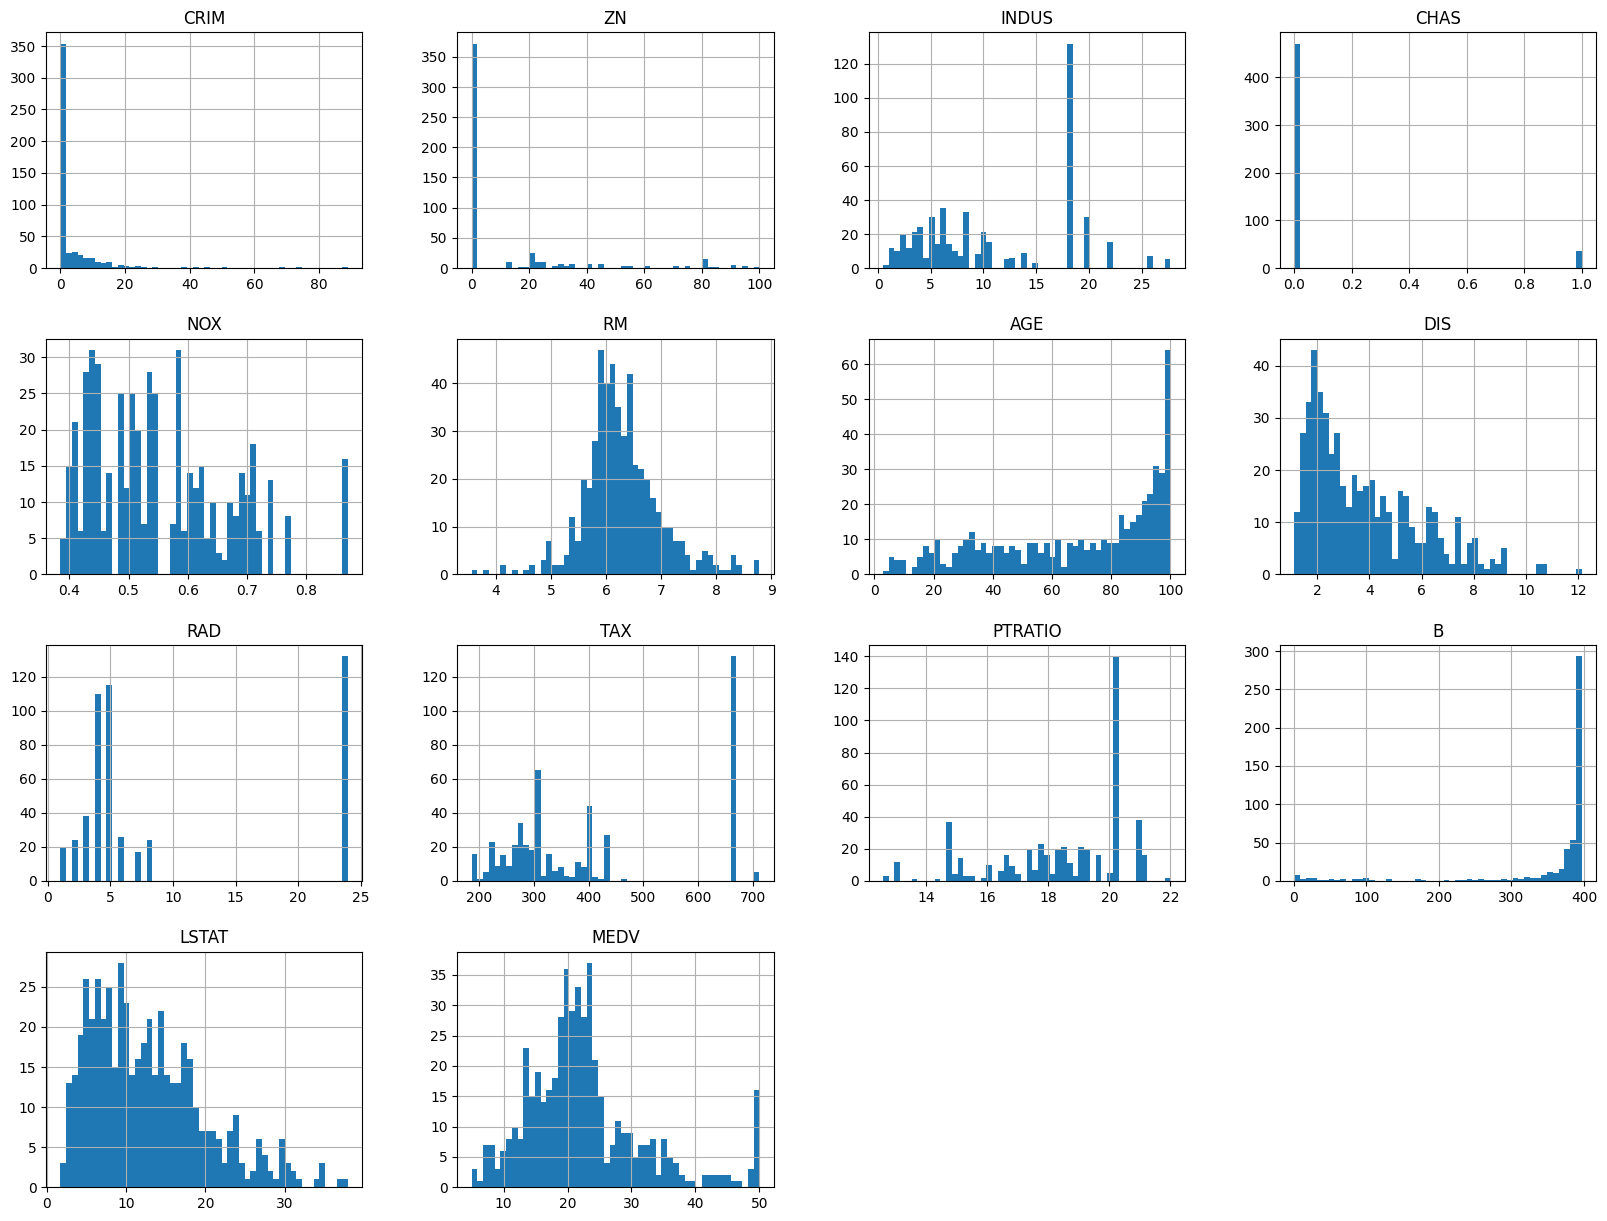

In [10]:
# @title Visão De Todas as Variáveis ao Mesmo Tempo
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Podemos observar, intuitivamente, que nem todas as distribuições seguem uma distibuição normal.

Aqui vale ressaltar que o a variável CHAS é uma representação numérica aleatória de categorias sem relação de ordem. Assim, a análise de correção perde um pouco do sentido.

Será interessante olhar outras métricas mais fortes que nos diga se de fato ela será poderosa em nosso modelo, ou não.

# **2. Separação do conjunto em treino e teste**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Função para discretizar variáveis numéricas e estratificar
def stratified_sampling(data, max_bins, columns):
    df = data.copy()

    # Discretizar colunas numéricas
    for column in columns:
        unique_values = df[column].nunique()
        if unique_values > max_bins:
            bins = max_bins
            df[column + '_decile'] = pd.qcut(df[column], q=bins, labels=[str(i+1) for i in range(bins)], duplicates='drop')
        else:
            bins = unique_values
            df[column + '_decile'] = pd.cut(df[column], bins=bins, labels=[str(i+1) for i in range(bins)], include_lowest=True)

    # Criar coluna de estratificação
    df['stratify_column'] = df[[col + '_decile' for col in columns]].apply(lambda row: '_'.join(row.astype(str)), axis=1)

    # Ajustar classes com menos de 2 observações
    class_counts = df['stratify_column'].value_counts()
    rare_classes = class_counts[class_counts < 2].index
    if len(rare_classes) > 0:
        df.loc[df['stratify_column'].isin(rare_classes), 'stratify_column'] = 'OTHER'

    # Realizar amostragem estratificada
    train, test = train_test_split(df, stratify=df['stratify_column'], test_size=0.25, random_state=42)

    # Remover colunas auxiliares
    columns_to_drop = [col + '_decile' for col in columns] + ['stratify_column']
    train.drop(columns=columns_to_drop, inplace=True)
    test.drop(columns=columns_to_drop, inplace=True)

    return train, test

# Aplicar amostragem estratificada
train_set, test_set = stratified_sampling(
    housing,
    25,
    ['RM', 'DIS', 'LSTAT', 'MEDV']
)

###Verificar tamanhos
print(f"Train size: {len(train_set)}")
print(f"Test size: {len(test_set)}")
print(f"Total: {len(train_set) + len(test_set)}")
print('Train: '+ str(round(train_set.shape[0]/housing.shape[0], 4)*100) +'%')
print('Test: ' + str(round(test_set.shape[0] /housing.shape[0], 4)*100) +'%')

Train size: 379
Test size: 127
Total: 506
Train: 74.9%
Test: 25.1%


Vamos criar uma amostragem aleátoria para fins de comparação

In [15]:
train_set_aleatorio, test_set_aleatorio = train_test_split(housing, test_size=0.2, random_state=seed)
print('Train: '+ str(round(train_set_aleatorio.shape[0]/housing.shape[0], 4)*100) +'%')
print('Test: ' + str(round(test_set_aleatorio.shape[0] /housing.shape[0], 4)*100) +'%')

Train: 79.84%
Test: 20.16%


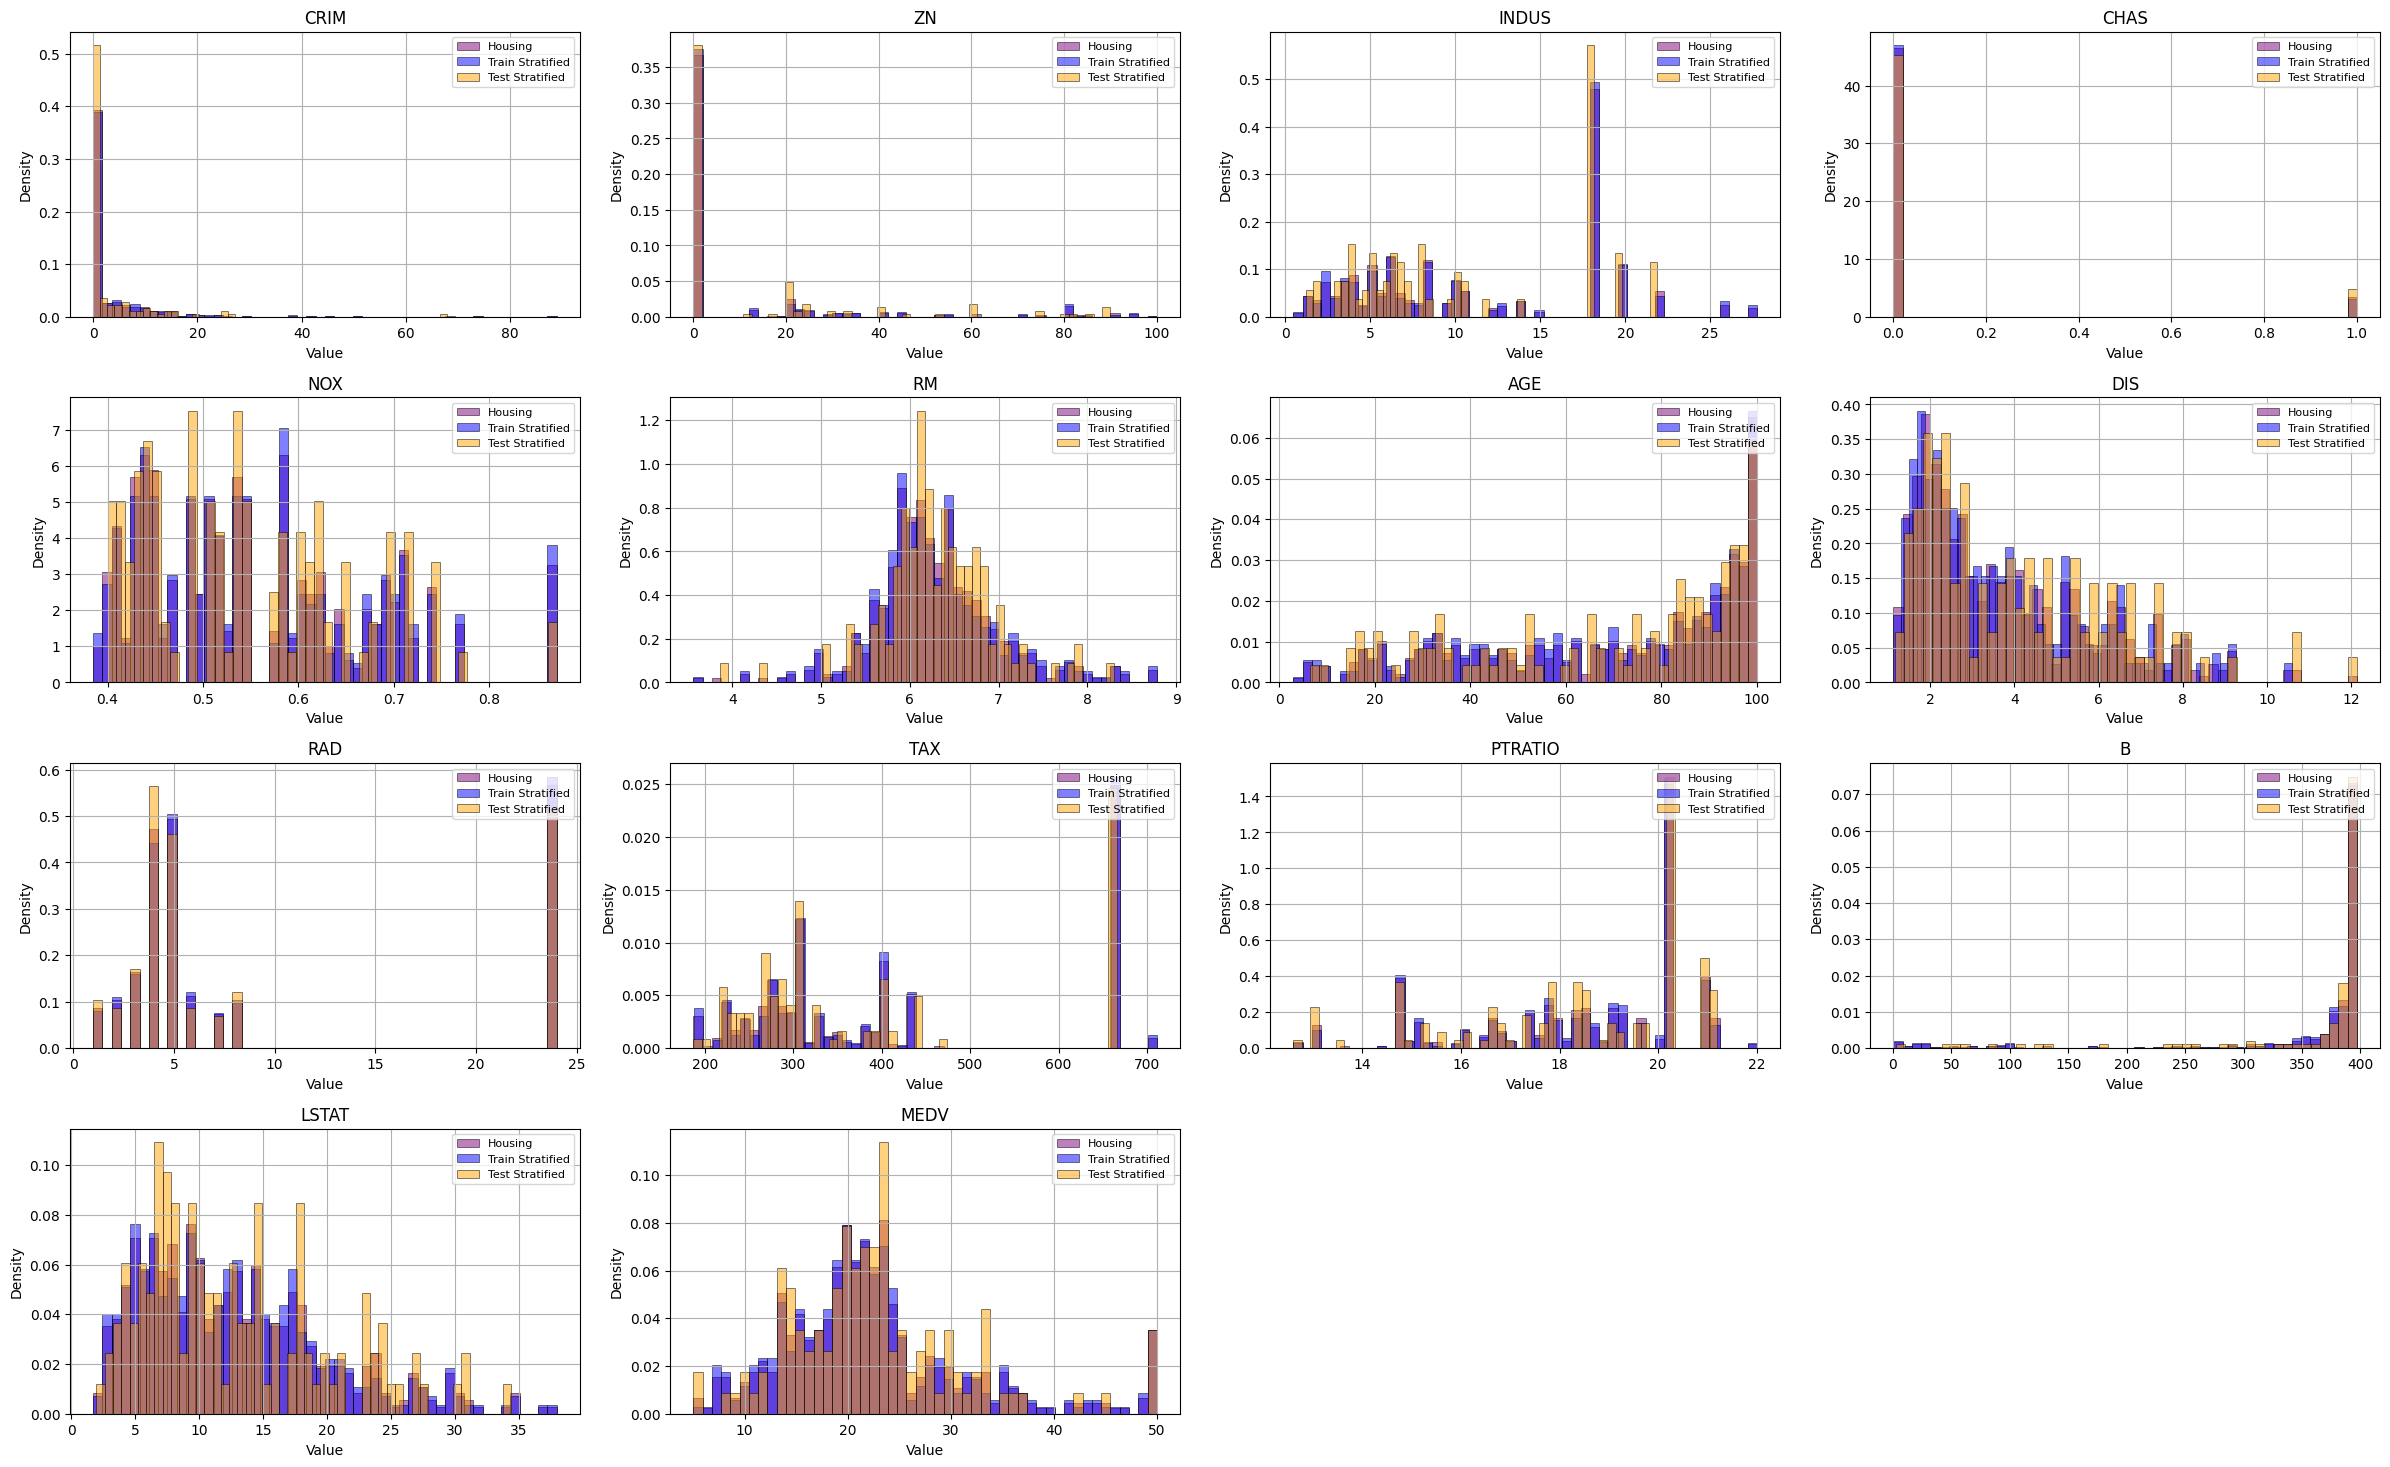

In [16]:
import matplotlib.pyplot as plt

def plot_train_test_distributions_percentual(housing, train, test,  columns):
    plt.figure(figsize=(24, 18))  # Ajuste do tamanho para comportar mais informações
    for i, column in enumerate(columns, 1):
        plt.subplot(5, 4, i)  # Ajusta a grade para 5x4, caso tenha mais colunas
        housing[column].hist(bins=50, alpha=0.5, label='Housing', color='purple', density=True, linewidth=0.7, edgecolor='black')
        train[column].hist(bins=50, alpha=0.5, label='Train Stratified', color='blue', density=True, linewidth=0.7, edgecolor='black')
        test[column].hist(bins=50, alpha=0.5, label='Test Stratified', color='orange', density=True, linewidth=0.7, edgecolor='black')

        plt.title(column, fontsize=12)
        plt.xlabel('Value', fontsize=10)
        plt.ylabel('Density', fontsize=10)
        plt.legend(loc='upper right', fontsize=8)
    plt.tight_layout()
    plt.show()

# Aplicar a função para visualizar distribuições percentuais
plot_train_test_distributions_percentual(
    housing, train_set, test_set, train_set.columns
)


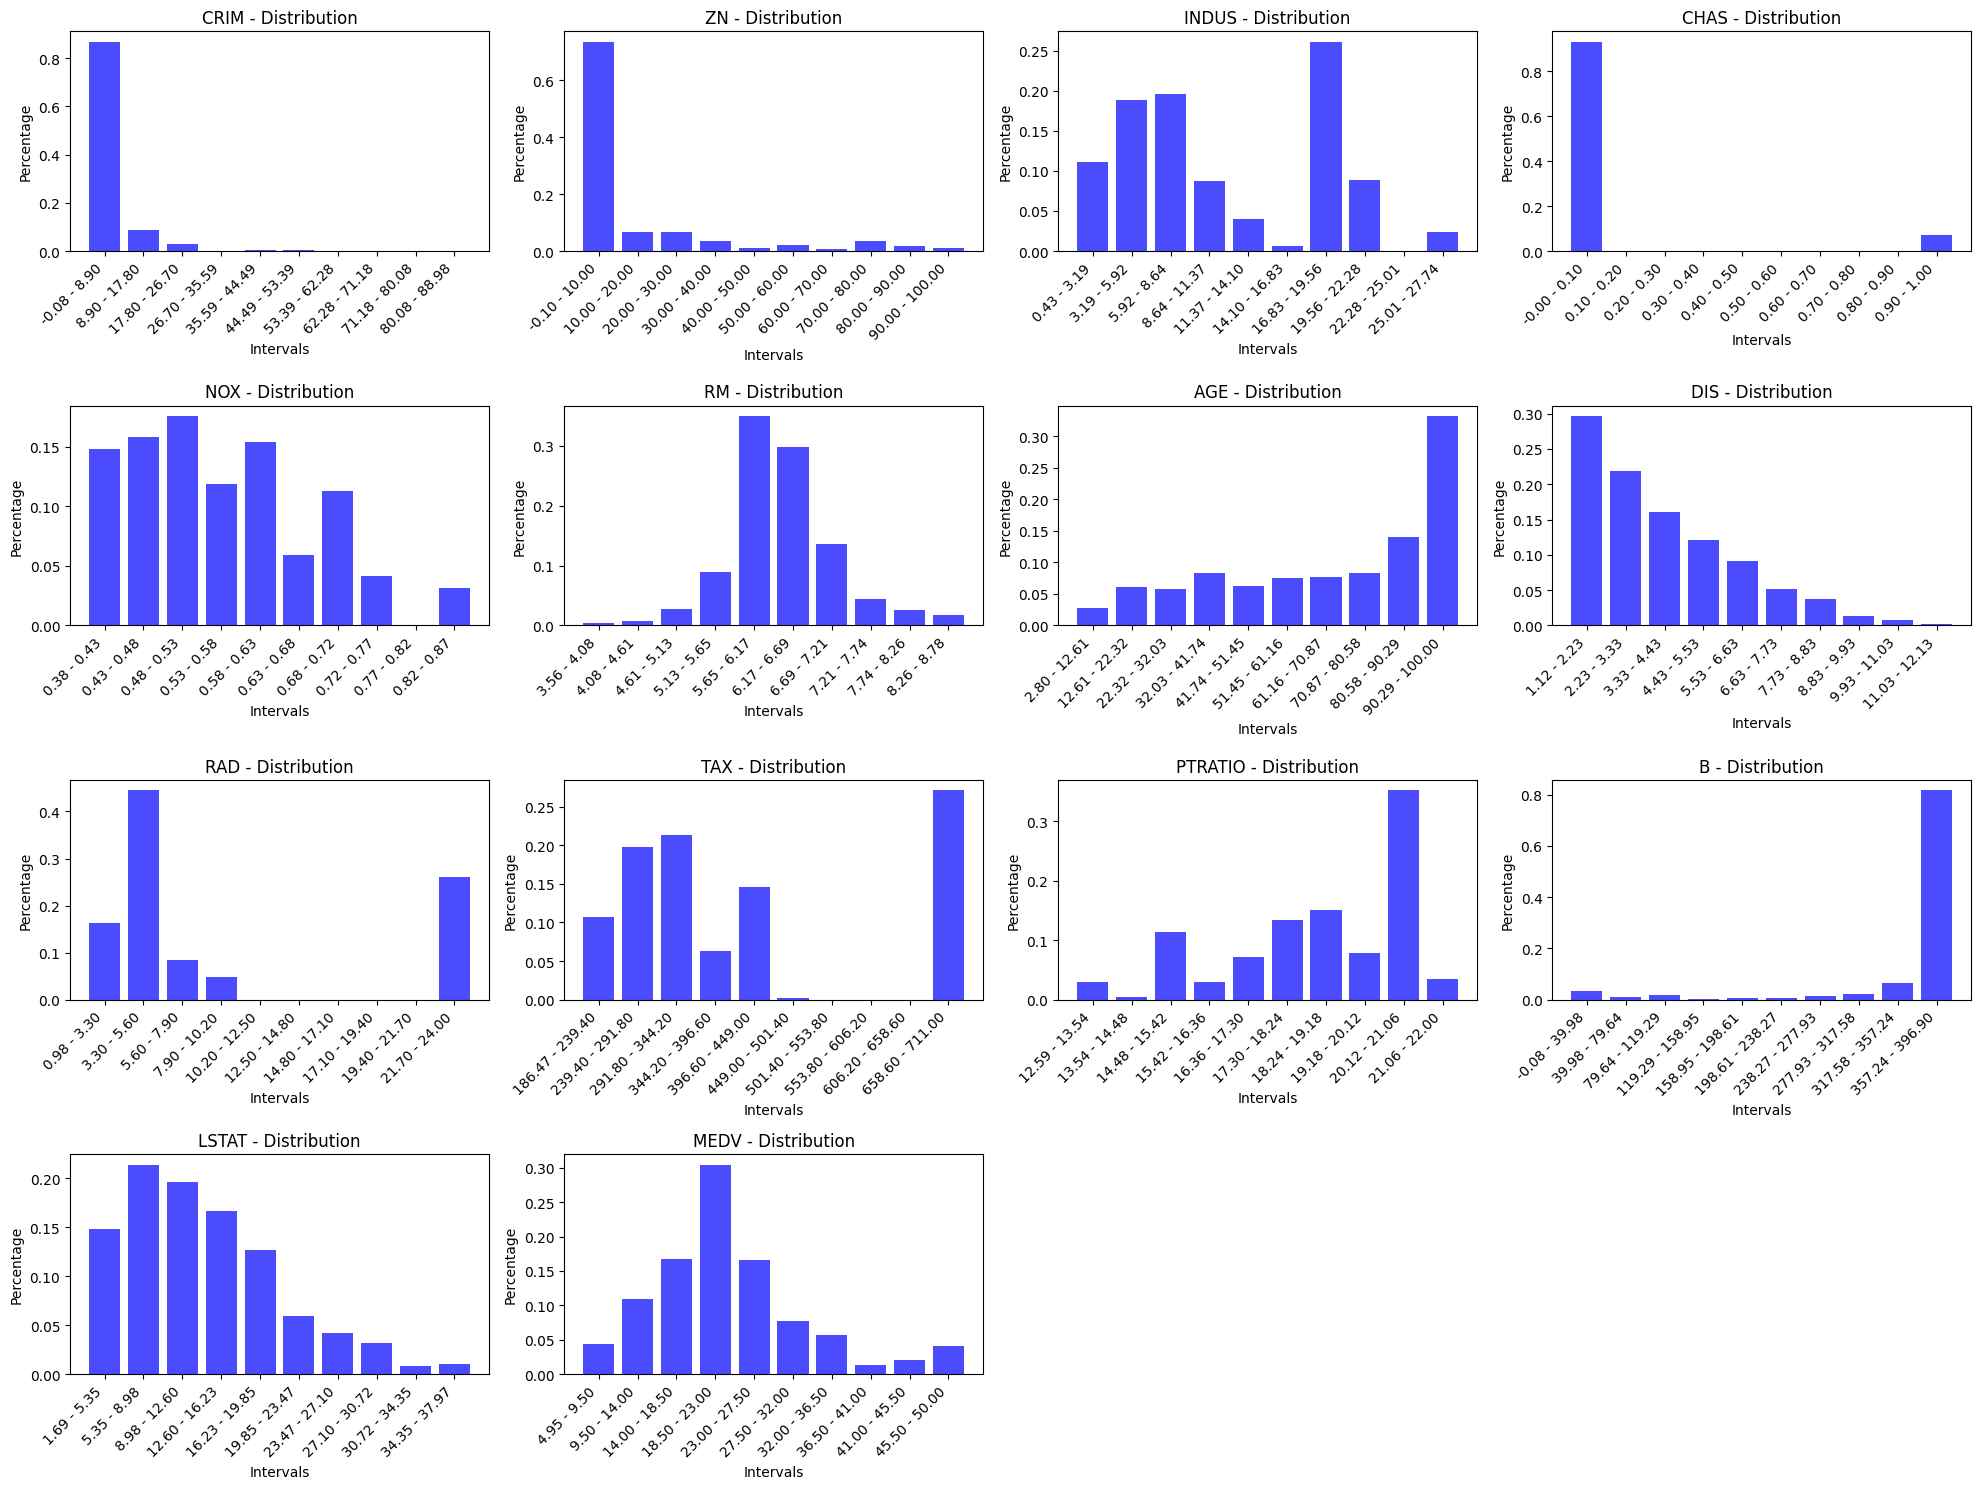

In [17]:
import matplotlib.pyplot as plt

def plot_variable_bins_with_labels(housing, columns, bins=10):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 4, i)

        # Criar bins com descrição dos intervalos
        housing_bins = pd.cut(housing[column], bins=bins, include_lowest=True)
        bin_counts = housing_bins.value_counts(normalize=True).sort_index()

        # Extrair labels descritivos dos intervalos
        bin_labels = [f"{interval.left:.2f} - {interval.right:.2f}" for interval in bin_counts.index]

        # Plotar distribuição percentual
        plt.bar(bin_labels, bin_counts.values, color='blue', alpha=0.7)
        plt.title(f'{column} - Distribution')
        plt.xlabel('Intervals')
        plt.ylabel('Percentage')
        plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos para melhor visualização

    plt.tight_layout()
    plt.show()

# Plotar distribuições de todas as variáveis do conjunto housing
plot_variable_bins_with_labels(housing, housing.columns)


In [18]:
# @title Verifica Eficiência da Amostragem Estratificada
import pandas as pd
import numpy as np

def variable_bins_dist(df_referencia_tmp, df_tmp, columns, bins=20):
    """
    Aplica bins consistentes baseados no dataframe de referência a outro dataframe
    e retorna a distribuição normalizada das variáveis binned.

    Args:
    - df_referencia: DataFrame de referência para calcular os bins.
    - df: DataFrame ao qual os bins serão aplicados.
    - columns: Lista de colunas para aplicar o binning.
    - bins: Número de bins a criar.

    Returns:
    - bin_counts: DataFrame com as distribuições normalizadas das variáveis.
    """
    df_referencia = df_referencia_tmp.copy()
    df = df_tmp.copy()

    bin_counts = pd.DataFrame()

    # Criar bins com base no df_referencia
    bin_edges = {}
    for column in columns:
        # Verificar se a coluna contém valores numéricos
        if not pd.api.types.is_numeric_dtype(df_referencia[column]):
            raise ValueError(f"A coluna {column} não é numérica. Verifique os dados.")

        # Remover NaNs antes de calcular os limites
        col_data = df_referencia[column].dropna()

        # Obter os limites dos intervalos dos bins
        _, bin_edges[column] = pd.cut(col_data, bins=bins, retbins=True, include_lowest=True)

    # Aplicar os bins ao df e calcular a distribuição
    for column in columns:
        # Substituir NaNs por um valor para evitar erros
        df[column] = df[column].fillna(df[column].median())

        # Aplicar os bins usando os limites calculados
        df['binned_' + column] = pd.cut(df[column], bins=bin_edges[column], include_lowest=True)
        counts = df['binned_' + column].value_counts(normalize=True).sort_index().reset_index()

        # Adicionar os nomes corretos às colunas
        counts.columns = ['Ranks', 'Perc_Distribuicao']
        counts['Variavel'] = column

        # Reorganizar as colunas para manter a ordem
        counts = counts[['Variavel', 'Ranks', 'Perc_Distribuicao']]

        # Concatenar com o DataFrame de resultados
        bin_counts = pd.concat([bin_counts, counts], ignore_index=True)

    return bin_counts

# Exemplo de uso:
# Certifique-se de que `columns` contém apenas colunas numéricas.
columns = housing.select_dtypes(include=[np.number]).columns

# Calcular distribuições no dataset de referência
dist_housing = variable_bins_dist(housing, housing, columns, bins=10)

# Aplicar os mesmos bins no test_set e no test_set_aleatorio
dist_test_set = variable_bins_dist(housing, test_set, columns, bins=10)
dist_test_set_aleatorio = variable_bins_dist(housing, test_set_aleatorio, columns, bins=10)

# Adicionar uma coluna de origem para identificar os DataFrames
dist_housing['Origem'] = 'housing'
dist_test_set['Origem'] = 'test_set'
dist_test_set_aleatorio['Origem'] = 'test_set_aleatorio'

# Concatenar os DataFrames verticalmente
final_df = pd.concat([dist_housing, dist_test_set, dist_test_set_aleatorio], axis=0, ignore_index=True)

# Transpor o DataFrame final para organizar as distribuições por variável e rank
final_df_pivot = (
    final_df.pivot_table(
        index=['Variavel', 'Ranks'],  # Índices para o pivot (join será por estes)
        columns='Origem',            # Coluna para criar colunas separadas
        values='Perc_Distribuicao'   # Valores a serem preenchidos
    )
    .reset_index()                   # Resetar índice após o pivot
)

# Renomear colunas para deixar os nomes mais descritivos
final_df_pivot.columns = [
    'Variavel', 'Ranks',
    'Perc_Distribuicao_Housing',
    'Perc_Distribuicao_Test_Set',
    'Perc_Distribuicao_Test_Set_Aleatorio'
]

# Preencher valores NaN com 0 (se necessário)
final_df_pivot = final_df_pivot.fillna(0)

# Calcular a diferença absoluta em relação ao Housing
final_df_pivot['Diff_Abs_Test_Set'] = (
    abs(final_df_pivot['Perc_Distribuicao_Housing'] - final_df_pivot['Perc_Distribuicao_Test_Set'])
)

final_df_pivot['Diff_Abs_Test_Set_Aleatorio'] = (
    abs(final_df_pivot['Perc_Distribuicao_Housing'] - final_df_pivot['Perc_Distribuicao_Test_Set_Aleatorio'])
)

final_df_pivot

# Agrupar por variável e calcular a média das diferenças absolutas
summary_df = (
    final_df_pivot.groupby('Variavel')[['Diff_Abs_Test_Set', 'Diff_Abs_Test_Set_Aleatorio']]
    .mean()
    .reset_index()
)

# Ordenar do maior para o menor com base na diferença absoluta média
summary_df = summary_df.sort_values(by=['Diff_Abs_Test_Set', 'Diff_Abs_Test_Set_Aleatorio'], ascending=False)

# Renomear colunas para deixá-las mais descritivas
summary_df.columns = ['Variavel', 'Media_Diff_Abs_Test_Set', 'Media_Diff_Abs_Test_Set_Aleatorio']
summary_df

,Variavel,Media_Diff_Abs_Test_Set,Media_Diff_Abs_Test_Set_Aleatorio
5,INDUS,0.017345,0.016539
0,AGE,0.017099,0.020918
13,ZN,0.016377,0.013935
11,RM,0.016190,0.012540
4,DIS,0.015110,0.011207
12,TAX,0.013622,0.013191
6,LSTAT,0.012244,0.021220
9,PTRATIO,0.011677,0.017128
1,B,0.011512,0.009626
7,MEDV,0.011335,0.017027


#**3. Visualização do conjunto de dados (análise exploratória básica)**

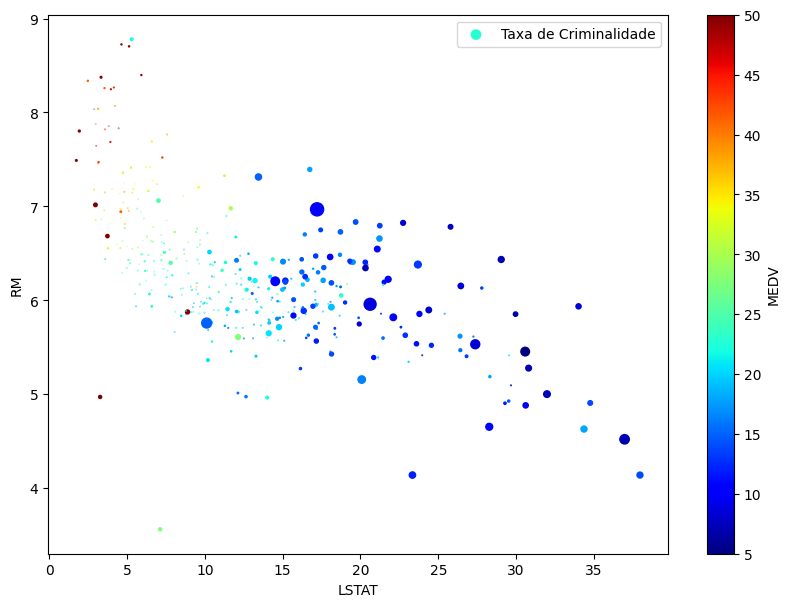

In [19]:
train_set.plot(kind="scatter", x="LSTAT", y="RM",
    s=train_set["CRIM"], label="Taxa de Criminalidade", figsize=(10,7),
    c="MEDV", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False) #sharex=false é só pra corrigir um bug de display https://github.com/pandas-dev/pandas/issues/10611
plt.legend()

array([[<Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='ZN', ylabel='CRIM'>,
        <Axes: xlabel='INDUS', ylabel='CRIM'>,
        <Axes: xlabel='CHAS', ylabel='CRIM'>,
        <Axes: xlabel='NOX', ylabel='CRIM'>,
        <Axes: xlabel='RM', ylabel='CRIM'>,
        <Axes: xlabel='AGE', ylabel='CRIM'>,
        <Axes: xlabel='DIS', ylabel='CRIM'>,
        <Axes: xlabel='RAD', ylabel='CRIM'>,
        <Axes: xlabel='TAX', ylabel='CRIM'>,
        <Axes: xlabel='PTRATIO', ylabel='CRIM'>,
        <Axes: xlabel='B', ylabel='CRIM'>,
        <Axes: xlabel='LSTAT', ylabel='CRIM'>,
        <Axes: xlabel='MEDV', ylabel='CRIM'>],
       [<Axes: xlabel='CRIM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='INDUS', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='NOX', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='AGE', ylabel='ZN'>,
        <Axes: xlabel='DIS', ylabel='ZN'>,
        <Axes: x

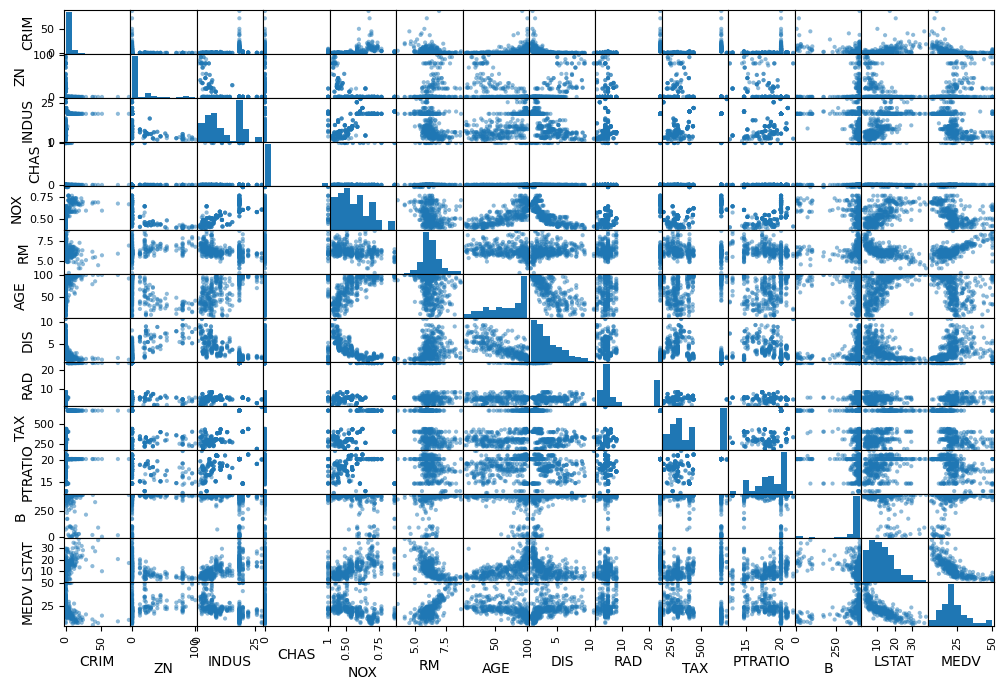

In [20]:
corr_matrix = train_set.corr()
corr_matrix["MEDV"].sort_values(ascending=False)
corr_matrix

from pandas.plotting import scatter_matrix
scatter_matrix(train_set, figsize=(12, 8))

In [21]:
# @title Correlação Linear entre Variáveis
# Calcular a matriz de correlação
correlation_matrix = train_set.corr()

# Criar o heatmap de correlação com valores sobrepostos
fig = px.imshow(correlation_matrix,
                text_auto=True,  # Mostra os valores da correlação no gráfico
                color_continuous_scale="RdBu_r",
                aspect="auto",
                title="Mapa de Correlação entre Variáveis")

# Exibir o gráfico
fig.show()

Aqui vale ressaltar que o a variável CHAS é uma representação numérica aleatória de categorias sem relação de ordem. Assim, a análise de correção perde um pouco do sentido.

Será interessante olhar outras méticas mais fortes que nos diga se de fato ela será poderosa em nosso modelo, ou não.

In [50]:
'''# @title ### **Vamos analisar se existe algum padrão aparente entre as variáveis coletadas e a variável alvo (MEDV)**
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import numpy as np

df = train_set
# Inicialização do app Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dashboard de Correlação e Regressão com MEDV"),

    # Dropdown para selecionar a variável no eixo X
    html.Label("Selecione a variável (eixo X):"),
    dcc.Dropdown(
        id='dropdown-variable',
        options=[{'label': col, 'value': col} for col in df.columns if col != 'MEDV'],
        value='LSTAT'
    ),

    # Gráfico de dispersão
    dcc.Graph(id='scatter-plot')
])

# Callback para atualizar o gráfico de dispersão
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('dropdown-variable', 'value')]
)
def update_scatter(variable):
    # Calcular o coeficiente de correlação
    corr_coef = np.corrcoef(df[variable], df['MEDV'])[0, 1]

    # Criar o gráfico de dispersão com linha de regressão
    fig = px.scatter(df, x=variable, y="MEDV", trendline="ols",
                     title=f'Dispersão de MEDV vs {variable} (Coeficiente de Correlação = {corr_coef:.2f})')

    # Adicionar coeficiente de correlação no título
    fig.update_layout(title=dict(x=0.5))  # Centraliza o título
    fig.update_traces(marker=dict(size=6))

    return fig

# Executa o app
if __name__ == '__main__':
    app.run_server(debug=True, port=8052)'''

'# @title ### **Vamos analisar se existe algum padrão aparente entre as variáveis coletadas e a variável alvo (MEDV)**\nimport pandas as pd\nimport dash\nfrom dash import dcc, html\nfrom dash.dependencies import Input, Output\nimport plotly.express as px\nimport numpy as np\n\ndf = train_set\n# Inicialização do app Dash\napp = dash.Dash(__name__)\n\napp.layout = html.Div([\n    html.H1("Dashboard de Correlação e Regressão com MEDV"),\n\n    # Dropdown para selecionar a variável no eixo X\n    html.Label("Selecione a variável (eixo X):"),\n    dcc.Dropdown(\n        id=\'dropdown-variable\',\n        options=[{\'label\': col, \'value\': col} for col in df.columns if col != \'MEDV\'],\n        value=\'LSTAT\'\n    ),\n\n    # Gráfico de dispersão\n    dcc.Graph(id=\'scatter-plot\')\n])\n\n# Callback para atualizar o gráfico de dispersão\n@app.callback(\n    Output(\'scatter-plot\', \'figure\'),\n    [Input(\'dropdown-variable\', \'value\')]\n)\ndef update_scatter(variable):\n    # Calcul

Aqui observamos mais de perto o comportamento dos dados em relação a variável target.

Na análise passada vimos quais tem maior correlação. Como a correlação linear usual é o coeficiente angular da regressão linear entre as duas variáveis, aproveitei para plotar as regresões as  originaram, a fim de observar se estão fazendo sentido.

Um **ponto de atenção** é que podem ocorrer casos em que exista uma var x1 = x2^2. Nesse caso, o coeficente de correlção **linear** será zero, mesmo uma sendo escrita completamente em função da outra.


Coeficiente de correlação linear entre x1 e x2: -0.00


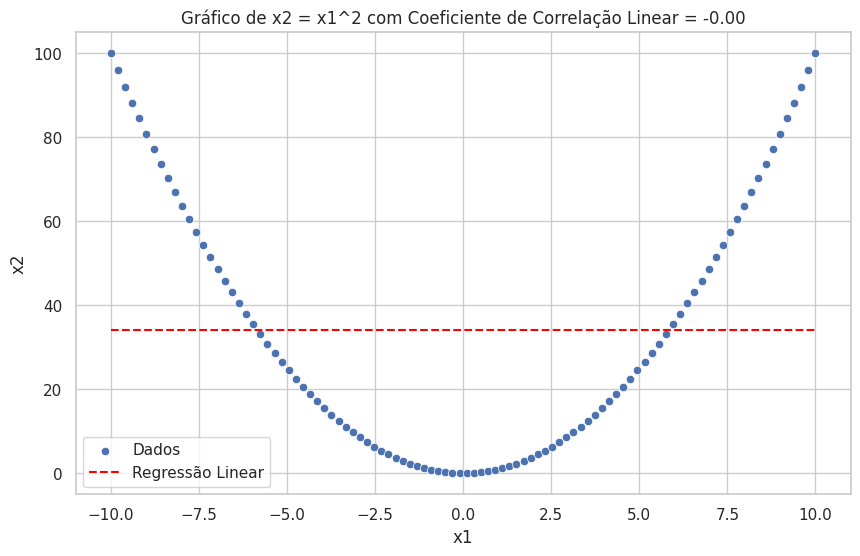

In [48]:
# @title  Conforme segue o exemplo abaixo.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress

# Gerando dados
np.random.seed(0)
x1 = np.linspace(-10, 10, 100)
x2 = x1**2  # x2 é uma função não-linear de x1

# Coeficiente de correlação linear
correlation, _ = pearsonr(x1, x2)
print(f"Coeficiente de correlação linear entre x1 e x2: {correlation:.2f}")

# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(x1, x2)
line = slope * x1 + intercept  # Linha de regressão linear

# Plotando
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x1, y=x2, label="Dados")
plt.plot(x1, line, color="red", linestyle="--", label="Regressão Linear")
plt.title(f"Gráfico de x2 = x1^2 com Coeficiente de Correlação Linear = {correlation:.2f}")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


#**4. Preparação do conjunto de dados**

Aqui evitamos o snooping bias estudando o dataframe de train.

In [23]:
housing = train_set.drop("MEDV", axis=1).copy() # O método drop cria cópia sem a coluna em questao
housing_labels = train_set["MEDV"].copy() #salvando uma cópia

In [24]:
### Verifica Missing

# Calcular o percentual de valores ausentes por variável
missing_percentage = housing.isnull().mean() * 100

# Criar um DataFrame para exibir de forma mais clara
missing_df = missing_percentage.reset_index()
missing_df.columns = ['Variável', 'Percentual de Missing']
missing_df = missing_df.sort_values(by='Percentual de Missing', ascending=False)

# Exibir o resultado
print(missing_df)


   Variável  Percentual de Missing
0      CRIM                    0.0
1        ZN                    0.0
2     INDUS                    0.0
3      CHAS                    0.0
4       NOX                    0.0
5        RM                    0.0
6       AGE                    0.0
7       DIS                    0.0
8       RAD                    0.0
9       TAX                    0.0
10  PTRATIO                    0.0
11        B                    0.0
12    LSTAT                    0.0


In [25]:
from sklearn.impute import SimpleImputer  # Para lidar com valores ausentes
from sklearn.preprocessing import StandardScaler  # Para normalizar/padronizar os dados
from sklearn.pipeline import Pipeline  # Para criar pipelines
from sklearn.preprocessing import FunctionTransformer  # Para transformações personalizadas

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing.select_dtypes(include=[np.number]))
housing_num_tr

array([[-0.33436587,  0.39660115, -1.05500805, ..., -2.58969266,
         0.39192776, -0.30426007],
       [-0.28203819, -0.46725997,  1.18191013, ..., -1.7857712 ,
         0.08333938, -1.12617229],
       [-0.4135427 , -0.46725997,  0.08566259, ...,  1.19346713,
         0.38756044, -0.41366135],
       ...,
       [-0.41010372, -0.46725997,  2.05174315, ...,  0.29496668,
         0.23949767,  0.74487021],
       [-0.40638836,  1.47642754, -1.13095722, ..., -1.54932372,
         0.29009466, -1.13038003],
       [ 0.41802524, -0.46725997,  0.96982564, ...,  0.81515115,
        -0.43637161,  1.93285596]])

In [26]:
from sklearn.compose import ColumnTransformer  # Para transformar colunas específicas
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing.select_dtypes(include=[np.number]))
cat_attribs = list(housing.select_dtypes(include=[object]))

#Este é o pipeline completo!
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), #um pipeline dentro do outro
        ("cat", OneHotEncoder(), cat_attribs),
    ])

""" Lembrando: num_pipeline é o pipeline que transforma variavéis numéricas

num_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy="median")),
      ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
      ('std_scaler', StandardScaler()),
    ])
"""

#### Salva conjunto Preparado
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.33436587,  0.39660115, -1.05500805, ..., -2.58969266,
         0.39192776, -0.30426007],
       [-0.28203819, -0.46725997,  1.18191013, ..., -1.7857712 ,
         0.08333938, -1.12617229],
       [-0.4135427 , -0.46725997,  0.08566259, ...,  1.19346713,
         0.38756044, -0.41366135],
       ...,
       [-0.41010372, -0.46725997,  2.05174315, ...,  0.29496668,
         0.23949767,  0.74487021],
       [-0.40638836,  1.47642754, -1.13095722, ..., -1.54932372,
         0.29009466, -1.13038003],
       [ 0.41802524, -0.46725997,  0.96982564, ...,  0.81515115,
        -0.43637161,  1.93285596]])

#**5. Comparar ao menos 3 modelos de machine learning e algumas configuração de hiperparâmetros, justificando a escolha do melhor modelo**

In [27]:
### Regressao Linear
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
#Ei Regressão linear, encontre os parâmetros que melhor aproxima os dados

LinearRegression()

In [28]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data) #Full pipeline

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [28.87288806 33.44213035 23.64646451 43.1073183  20.50886664]
Labels: [22.8, 41.3, 22.4, 50.0, 16.8]


In [29]:
from sklearn.metrics import mean_squared_error as MSE

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = MSE(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse) #Não é necessariamente obrigatório
print(lin_rmse)
print(lin_mse)

4.755112478760554
22.61109468566434


In [30]:
from sklearn.metrics import mean_absolute_error as MAE

lin_mae = MAE(housing_labels, housing_predictions)
lin_mae

3.4056598165674963

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state= seed, min_weight_fraction_leaf = 0.01) ### Evita overfitting
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(min_weight_fraction_leaf=0.01, random_state=26011994)

In [32]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = MSE(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.70220752222186

##**Avaliação de Modelos**

OBS: Os recursos da validação cruzada no Scikit-Learn esperam uma função de utilidade (mais alta é melhor) ao invés de uma função custo (mais alta é pior). Assim a função de pontução é oposto à função custo (negativa). Por isso o np.sqrt(-scores) no código abaixo.

In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

#cv = 10 é número de pedaços

tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)

[5.00290851 5.10349939 4.17066082 3.84573046 4.95920989 3.88144289
 6.38993583 5.27425722 4.7856654  3.70833419]


In [34]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [5.00290851 5.10349939 4.17066082 3.84573046 4.95920989 3.88144289
 6.38993583 5.27425722 4.7856654  3.70833419]
Mean: 4.712164458912813
Standard deviation: 0.7859186730855195


In [35]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [4.33031468 4.74998581 4.99622312 4.82811147 4.9615407  4.36036531
 5.87706935 6.04469585 4.66858135 5.33541533]
Mean: 5.015230296879904
Standard deviation: 0.5506195899684442


In [36]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42, min_weight_fraction_leaf = 0.01)
forest_reg.fit(housing_prepared, housing_labels) #Treinar modelo

housing_predictions = forest_reg.predict(housing_prepared) #Predizer
forest_mse = MSE(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

2.3215711346628507
Scores: [3.5748206  4.11777415 3.06976151 3.54964922 4.29142487 3.5881531
 5.53258434 3.84886874 3.93461258 2.84388981]
Mean: 3.835153891626483
Standard deviation: 0.7041401396394895


#**Ajustando o Modelo Escolhido**

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Vamos tentar 12 = 3x4 combinação de parâmetros
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Tentar 6 = 2×3 combinações do bootstrap no modo 'Falso'
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=seed, min_weight_fraction_leaf = 0.01)

# Vamos treinar com 5-folds, então temos (12+6)*5=90 rodadas de treinamento!!!

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(cv=5,
             estimator=RandomForestRegressor(min_weight_fraction_leaf=0.01,
                                             random_state=26011994),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [39]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, min_weight_fraction_leaf=0.01,
                      n_estimators=30, random_state=26011994)

In [40]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.633975585838577 {'max_features': 2, 'n_estimators': 3}
4.494762625104177 {'max_features': 2, 'n_estimators': 10}
4.29911470984529 {'max_features': 2, 'n_estimators': 30}
4.5429695850379685 {'max_features': 4, 'n_estimators': 3}
4.202018532483032 {'max_features': 4, 'n_estimators': 10}
3.884859998189981 {'max_features': 4, 'n_estimators': 30}
4.644081546775624 {'max_features': 6, 'n_estimators': 3}
4.066669433786968 {'max_features': 6, 'n_estimators': 10}
3.7447291444233013 {'max_features': 6, 'n_estimators': 30}
4.400847886956663 {'max_features': 8, 'n_estimators': 3}
4.112516903991806 {'max_features': 8, 'n_estimators': 10}
3.866675478190943 {'max_features': 8, 'n_estimators': 30}
5.311253023168529 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4.267386126901133 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
4.52423877373302 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
4.1782963594819265 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [41]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008497,0.001749,0.001547,0.000190,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-32.451016,-29.637347,...,-31.741681,6.198407,18,-17.022994,-15.433988,-16.625795,-12.596792,-14.934165,-15.322747,1.560960
1,0.020499,0.005419,0.001892,0.000352,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-19.881131,-11.129755,...,-20.202891,8.204231,12,-11.043196,-9.960044,-9.140966,-6.724472,-9.565042,-9.286744,1.428453
2,0.050355,0.003057,0.002783,0.000159,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-14.428574,-9.244929,...,-18.482387,7.251201,9,-8.975248,-8.967691,-8.508343,-6.871089,-8.487560,-8.361986,0.774975
3,0.007249,0.001340,0.001265,0.000066,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-16.492632,-14.501017,...,-20.638573,5.887725,14,-9.532436,-10.627386,-9.128238,-7.071517,-9.020472,-9.076010,1.152293
4,0.020726,0.002264,0.001881,0.000281,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-14.830712,-9.130070,...,-17.656960,7.386893,7,-7.957742,-8.044267,-7.470221,-5.176584,-7.245723,-7.178908,1.044419
5,0.094417,0.008878,0.004383,0.000270,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-12.056537,-8.406931,...,-15.092137,5.786144,3,-6.382908,-6.240464,-5.916961,-4.602802,-6.452304,-5.919088,0.683424
6,0.011582,0.001380,0.003066,0.002529,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-25.869073,-16.095471,...,-21.567493,5.365917,16,-9.281293,-9.109776,-8.759548,-6.780915,-6.606016,-8.107510,1.168058
7,0.033677,0.003300,0.002387,0.000064,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-17.142142,-9.349042,...,-16.537800,5.738138,4,-6.758561,-6.412792,-5.974094,-4.797636,-6.123139,-6.013244,0.664296
8,0.094998,0.004306,0.004457,0.001562,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-14.058378,-7.986304,...,-14.022996,5.418032,1,-5.239941,-5.476563,-5.207234,-4.616344,-5.696966,-5.247410,0.361808
9,0.012595,0.001093,0.001823,0.000032,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-26.423597,-14.394130,...,-19.367462,5.268747,11,-9.198623,-9.495074,-8.662367,-8.225030,-8.084700,-8.733159,0.544220


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=1000),
        'max_features': randint(low=1, high=11),
    }

forest_reg = RandomForestRegressor(random_state=seed, min_weight_fraction_leaf = 0.01)

rnd_search = RandomizedSearchCV(forest_reg,
                                param_distributions=param_distribs,
                                n_iter=100,
                                cv=5,
                                scoring='neg_mean_squared_error',
                                random_state=seed)

rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(min_weight_fraction_leaf=0.01,
                                                   random_state=26011994),
                   n_iter=100,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79dc0e167e20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79dc0dc0af20>},
                   random_state=26011994, scoring='neg_mean_squared_error')

In [43]:
rnd_search.best_params_

{'max_features': 6, 'n_estimators': 236}

In [44]:
'''cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)'''

'cvres = rnd_search.cv_results_\nfor mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):\n    print(np.sqrt(-mean_score), params)'

In [45]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

# Criar um DataFrame com as importâncias e os nomes das variáveis
feature_importance_df = pd.DataFrame({
    'Feature': housing.columns,  # Nomes das variáveis
    'Importance': feature_importances  # Importância de cada variável
})

feature_importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
12,LSTAT,0.370947
5,RM,0.356677
7,DIS,0.055550
0,CRIM,0.049237
10,PTRATIO,0.040590
6,AGE,0.032102
2,INDUS,0.030756
4,NOX,0.028324
9,TAX,0.013563
11,B,0.013141


#**Modelo e Teste Final**

In [46]:
# 1. Instanciar o modelo
final_model_best_params = rnd_search.best_params_
final_model = RandomForestRegressor(random_state=seed
                                    , min_weight_fraction_leaf = 0.01
                                    , **final_model_best_params
                                    )

# 2. Treinar no conjunto de treino
final_model.fit(housing_prepared, housing_labels)

# 3. Prever num conjunto
X_test = test_set.drop("MEDV", axis=1).copy()
y_test = test_set["MEDV"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)
print(final_mse)

3.3273346853525343
11.07115610835005


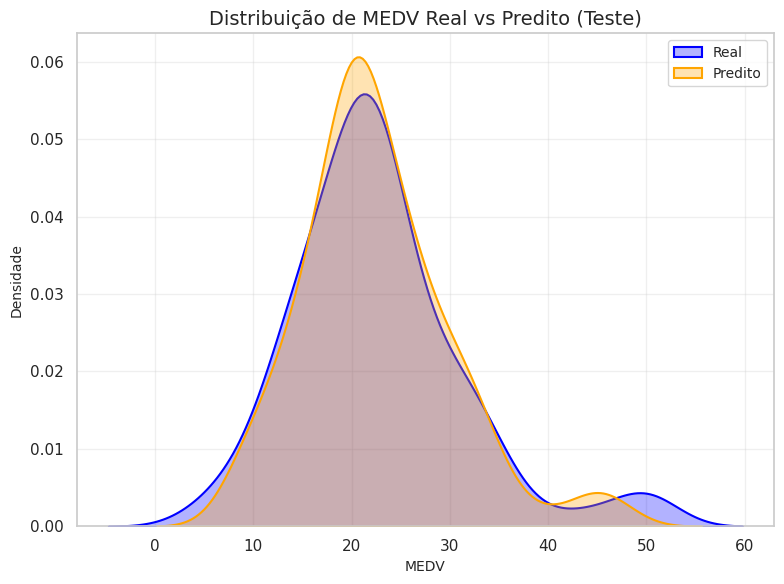

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo do seaborn para o gráfico
sns.set(style="whitegrid")

# Criar um DataFrame para facilitar a manipulação dos dados
import pandas as pd
results_df = pd.DataFrame({
    "Real": y_test,
    "Predito": final_predictions
})

# Configurar o tamanho da figura
plt.figure(figsize=(8, 6))  # Tamanho menor

# Plotar as distribuições
sns.kdeplot(results_df["Real"], label="Real", color="blue", linewidth=1.5, fill=True, alpha=0.3)
sns.kdeplot(results_df["Predito"], label="Predito", color="orange", linewidth=1.5, fill=True, alpha=0.3)

# Títulos e legendas
plt.title("Distribuição de MEDV Real vs Predito (Teste)", fontsize=14)
plt.xlabel("MEDV", fontsize=10)
plt.ylabel("Densidade", fontsize=10)
plt.legend(fontsize=10)
plt.grid(visible=True, alpha=0.3)

# Mostrar o gráfico
plt.tight_layout()  # Melhor ajuste
plt.show()
